# Ka|Ve 2023 - Yapay Zeka MasterClass Eğitimi - Seçme Sınav Soruları - Uygulamalı Ağırlıklı Sorular

# Soru-1

Bu çalışma kapsamında sizden belirlediğiniz bir verisetinde bir makine öğrenmesi modeli kurmanız ardından bu modeli bir uygulamaya çevirip, dockerize edip bir bulut bilişimde canlıya almanızı bekliyoruz. Ardından bütün kodunuzu dokümante ederek github'a yüklemenizi istiyoruz. 

### Önemli Not: Başvuru kabulü için size sorulan soruyu çözmenizden çok, o soruyu çözmek için ne kadar uğraştığınız önemlidir. Motivasyonu yüksek gençlerle çalışmak çok farklı, bunu biliyoruz, sizi önemsiyoruz ve bekliyoruz.


### Soru İçeriği
1. Herhangi bir verisetini kullanarak bir makine öğrenme algoritmasının kurulması
2. Bu makine öğrenme algoritmasının streamlit veya farklı bir framework ile bir uygulamaya dönüştürülmesi
3. Uygulamanın dockerize edilmesi
4. Dockerize edilen uygulamanın herhangi bir bulut bilişim servisinde canlıya alınması
5. Kodların github'a yüklenip dokümante edilmesi

### Kaynaklar
1. [Streamlit ile Makine Öğrenmesi Uygulaması Örneği](https://towardsdatascience.com/building-a-machine-learning-web-application-using-streamlit-8c3d942f7b35)
2. [Streamlit Uygulamasının AWS üzerinde Canlıya Alınması & Dockerize Edilmesi](https://docs.streamlit.io/knowledge-base/deploy/deploy-streamlit-heroku-aws-google-cloud)


### Notlar
- AWS, GCloud üzerinde ilk denemeler için ücretsiz servisler var bu servisleri kullanabilirsiniz. Aynı zamanda [Github Student Pack](https://education.github.com/pack) kapsamında Digital Ocean, Azure için ücretsiz kredi tanımlaması bulunuyor. 

- Uygulamada bir parçasını yapamasanız bile (Örneğin dockerize edemediniz ama bir serviste canlıya aldınız) buda bizim için uygundur. Kritik olan kısım çabanız ve motivasyonunuzdur. 

# Soru-2

Bu çalışma kapsamında sizden belirlediğiniz Kaggle ya da farklı blog'lar üzerinde ilginizi çeken, pytorch kütüphanesini kullanarak Transformer tabanlı (BERT, GPT, T5, MT5, vs.) bir jupyter notebook'u çalıştırmanızı ve bunu github'a yükleyerek bize göndermenizi bekliyoruz. 

### Önemli Not: Başvuru kabulü için size sorulan soruyu çözmenizden çok, o soruyu çözmek için ne kadar uğraştığınız önemlidir. Motivasyonu yüksek gençlerle çalışmak çok farklı, bunu biliyoruz, sizi önemsiyoruz ve bekliyoruz.


### Soru İçeriği
1. Kaggle veya farklı bir kaynaktan içerisinde Pytorch kütüphanesini kullanarak Transformer tabanlı bir model üreten notebook'un bulunup çalıştırılması
2. Kodların github'a yüklenip dokümante edilmesi

### Kaynaklar
1. [Örnek T5 Eğitimi](https://www.kaggle.com/code/kreeshrajani/fine-tune-t5-for-conversational-model)
2. [Transformer Modellerinin Eğitimini Kolaylaştıran HappyTransformers](https://pypi.org/project/happytransformer/)

# MULTILABEL BERT FINETUNING
https://lajavaness.medium.com/multiclass-and-multilabel-text-classification-in-one-bert-model-95c54aab59dc

train at https://gist.githubusercontent.com/ljnmedium/778838a1416763fa45e119adfaf68a85/raw/0fd44fd83ea7cce0f533e7aa2a46f244878e5dd4/input.train.jsonlines

validation at https://gist.githubusercontent.com/ljnmedium/d8e7e770eee9b9cd32d7f3d82d6bb716/raw/83812ae5f8e30b09efccb999ee175012ae1a6d4f/input.validation.jsonlines

In [1]:
# In this tutorial, we use "pandas==1.4.2", "numpy==1.21.6", "datasets==2.2.2", "transformers==4.18.0", "scikit-learn==1.0.2"
import pandas as pd
import numpy as np
import json
import torch

from datasets import Dataset, load_metric
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, Trainer, TrainerCallback, TrainingArguments
from torch.utils.data import DataLoader

from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin C:\Users\Tuncay\anaconda3\envs\env\Lib\site-packages\bitsandbytes\libbitsandbytes_cuda116.dll
CUDA SETUP: CUDA runtime path found: C:\Users\Tuncay\anaconda3\bin\cudart64_110.dll
CUDA SETUP: Highest compute capability among GPUs detected: 8.6
CUDA SETUP: Detected CUDA version 116
CUDA SETUP: Loading binary C:\Users\Tuncay\anaconda3\envs\env\Lib\site-packages\bitsandbytes\libbitsandbytes_cuda116.dll...


In [2]:
#Label kodlarının anlamları
LABEL_DICTIONARY = {
    "S1": "Very positive",
    "S2": "Positive",
    "S3": "Neutral",
    "S4": "Negative",
    "S5": "Very negative",
    "E1": "Satisfaction",
    "E2": "Insatisfaction",
    "E3": "Anger",
    "E4": "Agressivity",
    "E5": "Sadness/Demotivation",
    "E6": "Fear",
    "E7": "Distress/Serious situation",
    "E8": "Reclamation",
    "E10": "Urgency",
    "E11": "Happiness",
    "C1": "Physical Framework",
    "C2": "Unreachability",
    "C3": "Direct interaction",
    "C4": "Service/Problem resolution",
    "C5": "Complexity/Simplicity",
    "C6": "Errors",
    "C10": "Address/Schedule",
    "C11": "Self-service",
    "C12": "Delay of treatment",
    "C7": "Other causes",
    "C8": "I don't understand",
    "C9": "No cause",

}

In [3]:
#Label'ların indexleri
GLOBAL_SCORE_LABELS = ["S1", "S2", "S3", "S4", "S5"]
GLOBAL_SCORE_INDICES = range(0, 5)
EMOTION_LABELS = ["E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8", "E10", "E11"]
EMOTION_INDICES = range(5, 15)
CAUSE_LABELS = ["C1", "C2", "C3", "C4", "C5", "C6", "C10", "C11", "C12", "C7", "C8", "C9"]
CAUSE_INDICES = range(15, 27)
ALL_LABELS = GLOBAL_SCORE_LABELS + EMOTION_LABELS + CAUSE_LABELS

In [4]:
#Label'ların numaralandırılması
id2label = {k:l for k, l in enumerate(ALL_LABELS)}
label2id = {l:k for k, l in enumerate(ALL_LABELS)}

In [5]:
#Train test verilerinin yüklenmesi
raw_train_ds = Dataset.from_json("train.jsonlines")
raw_val_ds = Dataset.from_json("validation.jsonlines")
ds = {"train": raw_train_ds, "validation": raw_val_ds}

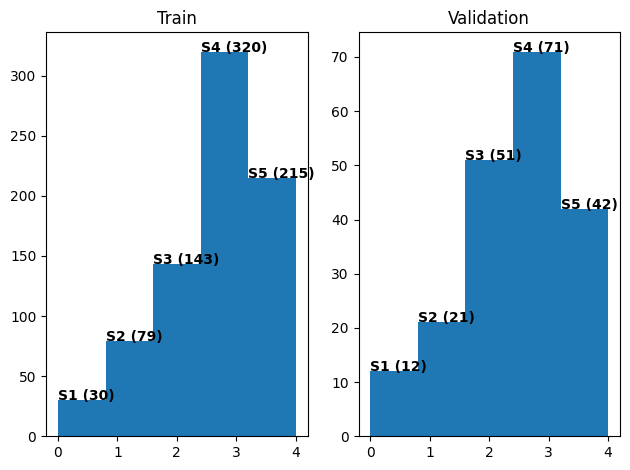

In [6]:
#Verilerin işlenmeden önce görselleştirilmesi
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, tight_layout=True)
distributions = []

axs[0].set_title("Train"); axs[1].set_title("Validation")
train_distributions = axs[0].hist([label2id[l] for l in raw_train_ds["global_score"]], bins=5)
val_distributions = axs[1].hist([label2id[l] for l in raw_val_ds["global_score"]], bins=5)

for distributions, ax in zip([train_distributions, val_distributions], axs):
    for j in range(5):
        # Display the counts on each column of the histograms
        ax.text(distributions[1][j], distributions[0][j], id2label[j] + " (" + str(int(distributions[0][j])) + ")", weight="bold")

In [7]:
#BERT Modeli parametreleri (Fransızca model)
BASE_MODEL = "camembert-base"
LEARNING_RATE = 1e-4
MAX_LENGTH = 256
BATCH_SIZE = 4
EPOCHS = 10

In [8]:
#Tokenizer ve model'in yüklenmesi
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
model = AutoModelForSequenceClassification.from_pretrained(BASE_MODEL, id2label=id2label, label2id=label2id)

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
#Label'ın multiclass olup olmadığının belirlenmesi
def preprocess_function(examples: dict):
    labels = [0] * len(id2label)
    for k, l in id2label.items():
        if l == examples["global_score"] or l in examples["emotions"] or l in examples["causes"]:
            labels[k] = 1
        else:
            labels[k] = 0
    examples = tokenizer(examples["text"], truncation=True, padding="max_length", max_length=256)
    examples["label"] = labels
    return examples

In [10]:
for split in ds:
    ds[split] = ds[split].map(preprocess_function, remove_columns=["id", "text", "global_score", "emotions", "causes"])

Map:   0%|          | 0/197 [00:00<?, ? examples/s]

In [5]:
def get_preds_from_logits(logits):
    ret = np.zeros(logits.shape)
    
    # The first 5 columns (GLOBAL_SCORE_INDICES) are for global scores. They should be handled with a multiclass approach
    # i.e. we fill 1 to the class with highest probability, and 0 into the other columns
    best_class = np.argmax(logits[:, GLOBAL_SCORE_INDICES], axis=-1)
    ret[list(range(len(ret))), best_class] = 1
    
    # The other columns are for causes and emotions. They should be handled with multilabel approach.
    # i.e. we fill 1 to every class whose score is higher than some threshold
    # In this example, we choose that threshold = 0
    ret[:, CAUSE_INDICES] = (logits[:, CAUSE_INDICES] >= 0).astype(int)
    ret[:, EMOTION_INDICES] = (logits[:, EMOTION_INDICES] >= 0).astype(int)
    
    return ret

In [12]:
#Eğitim sırasında sonuçların hesaplanması
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    final_metrics = {}
    
    # Deduce predictions from logits
    predictions = get_preds_from_logits(logits)
    
    # Get f1 metrics for global scoring. Notice that f1_micro = accuracy
    final_metrics["f1_micro_for_global_score"] = f1_score(labels[:, GLOBAL_SCORE_INDICES], predictions[:, GLOBAL_SCORE_INDICES], average="micro")
    final_metrics["f1_macro_for_global_score"] = f1_score(labels[:, GLOBAL_SCORE_INDICES], predictions[:, GLOBAL_SCORE_INDICES], average="macro")
    
    # Get f1 metrics for causes
    final_metrics["f1_micro_for_causes"] = f1_score(labels[:, CAUSE_INDICES], predictions[:, CAUSE_INDICES], average="micro")
    final_metrics["f1_macro_for_causes"] = f1_score(labels[:, CAUSE_INDICES], predictions[:, CAUSE_INDICES], average="macro")
    
    # Get f1 metrics for emotions
    final_metrics["f1_micro_for_emotions"] = f1_score(labels[:, EMOTION_INDICES], predictions[:, EMOTION_INDICES], average="micro")
    final_metrics["f1_macro_for_emotions"] = f1_score(labels[:, EMOTION_INDICES], predictions[:, EMOTION_INDICES], average="macro")

    # The global f1_metrics
    final_metrics["f1_micro"] = f1_score(labels, predictions, average="micro")
    final_metrics["f1_macro"] = f1_score(labels, predictions, average="macro")
    
    # Classification report
    print("Classification report for global scores: ")
    print(classification_report(labels[:, GLOBAL_SCORE_INDICES], predictions[:, GLOBAL_SCORE_INDICES], zero_division=0))
    print("Classification report for causes: ")
    print(classification_report(labels[:, CAUSE_INDICES], predictions[:, CAUSE_INDICES], zero_division=0))
    print("Classification report for emotions: ")
    print(classification_report(labels[:, EMOTION_INDICES], predictions[:, EMOTION_INDICES], zero_division=0))
    return final_metrics

In [13]:
class MultiTaskClassificationTrainer(Trainer):
    def __init__(self, group_weights=None, **kwargs):
        super().__init__(**kwargs)
        self.group_weights = group_weights
        
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs[0]
        
        global_score_loss = torch.nn.functional.cross_entropy(logits[:, GLOBAL_SCORE_INDICES], labels[:, GLOBAL_SCORE_INDICES])
        emotion_loss = torch.nn.functional.binary_cross_entropy_with_logits(logits[:, EMOTION_INDICES], labels[:, EMOTION_INDICES])
        cause_loss = torch.nn.functional.binary_cross_entropy_with_logits(logits[:, CAUSE_INDICES], labels[:, CAUSE_INDICES])
        
        loss = self.group_weights[0] * global_score_loss + self.group_weights[2] * emotion_loss + self.group_weights[1] * cause_loss
        return (loss, outputs) if return_outputs else loss

In [14]:
class PrinterCallback(TrainerCallback):
    def on_epoch_end(self, args, state, control, logs=None, **kwargs):
        print(f"Epoch {state.epoch}: ")

In [15]:
#Eğitim argümanları
training_args = TrainingArguments(
    output_dir="./models/camembert-fine-tuned",
    learning_rate=LEARNING_RATE,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=EPOCHS,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    metric_for_best_model="f1_macro",
    load_best_model_at_end=True,
    weight_decay=0.01,
)

trainer = MultiTaskClassificationTrainer(
    model=model,
    args=training_args,
    train_dataset=ds["train"],
    eval_dataset=ds["validation"],
    compute_metrics=compute_metrics,
    callbacks=[PrinterCallback],
    group_weights=(0.7, 4, 4)
)

In [16]:
#Eğitimin yapılması
trainer.train()

C:\Users\Tuncay\anaconda3\envs\env\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1 Micro For Global Score,F1 Macro For Global Score,F1 Micro For Causes,F1 Macro For Causes,F1 Micro For Emotions,F1 Macro For Emotions,F1 Micro,F1 Macro
1,No log,2.912777,0.451777,0.301366,0.000000,0.000000,0.000000,0.000000,0.222222,0.055809
2,No log,2.682622,0.598985,0.483432,0.000000,0.000000,0.415385,0.140107,0.393593,0.141416
3,3.002700,2.580309,0.619289,0.494155,0.132812,0.031835,0.565476,0.198666,0.474645,0.179239
4,3.002700,2.656236,0.639594,0.512226,0.147287,0.036822,0.550296,0.184652,0.480808,0.179612
5,3.002700,2.493484,0.654822,0.525819,0.000000,0.000000,0.579104,0.200203,0.476291,0.171523
6,2.245700,2.707542,0.624365,0.494371,0.198473,0.061242,0.545455,0.184112,0.484787,0.186959
7,2.245700,2.674792,0.634518,0.500627,0.116667,0.037098,0.530612,0.179988,0.470829,0.175859
8,1.959400,2.600064,0.654822,0.526762,0.187500,0.058635,0.526316,0.182883,0.489919,0.191343
9,1.959400,2.577970,0.644670,0.513314,0.193798,0.060076,0.555874,0.203328,0.497502,0.197065
10,1.959400,2.585205,0.644670,0.512158,0.201550,0.061965,0.576271,0.219301,0.506958,0.203607


Epoch 1.0: 
Classification report for global scores: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        21
           2       0.68      0.51      0.58        51
           3       0.35      0.31      0.33        71
           4       0.43      0.98      0.59        42

   micro avg       0.45      0.45      0.45       197
   macro avg       0.29      0.36      0.30       197
weighted avg       0.39      0.45      0.40       197
 samples avg       0.45      0.45      0.45       197

Classification report for causes: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00

Epoch 5.0: 
Classification report for global scores: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.46      0.62      0.53        21
           2       0.74      0.61      0.67        51
           3       0.65      0.72      0.68        71
           4       0.69      0.81      0.75        42

   micro avg       0.65      0.65      0.65       197
   macro avg       0.51      0.55      0.53       197
weighted avg       0.62      0.65      0.64       197
 samples avg       0.65      0.65      0.65       197

Classification report for causes: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00

Epoch 9.0: 
Classification report for global scores: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.45      0.62      0.52        21
           2       0.75      0.53      0.62        51
           3       0.61      0.85      0.71        71
           4       0.82      0.64      0.72        42

   micro avg       0.64      0.64      0.64       197
   macro avg       0.52      0.53      0.51       197
weighted avg       0.63      0.64      0.62       197
 samples avg       0.64      0.64      0.64       197

Classification report for causes: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        21
           2       0.76      0.33      0.46        48
           3       0.53      0.17      0.26        53
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00

TrainOutput(global_step=1970, training_loss=2.248939475432265, metrics={'train_runtime': 609.714, 'train_samples_per_second': 12.908, 'train_steps_per_second': 3.231, 'total_flos': 1035574400793600.0, 'train_loss': 2.248939475432265, 'epoch': 10.0})

In [10]:
#Eğitimden sonra finetune modelin yüklenmesi
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
model = AutoModelForSequenceClassification.from_pretrained(r".\models\camembert-fine-tuned\checkpoint-1970", id2label=id2label, label2id=label2id).to("cuda")

In [11]:
#Finetune edilen modelin test edilmesi
input_texts = [
               "C'est très bien", 
               "Je vais y aller.", 
               "J'en ai marre.", 
               "Vous ne foutez rien !!!", 
               "Je vous remercie infiniment pour cet excellent service !!!",
               "J'ai trop peur",
               "L'adresse n'existe pas. Il faut pas y aller.",
               "Je suis tellement triste.",
               "Votre site ne marche pas.",
               "Vous êtes nul.",
               "Personne n'a répondu à mon mail.",
               "C'est un arnaque ou quoi? Vous êtes vraiment nul.",
               "La procédure est vraiment trop longue et incompréhensible.",
               "L'accueil est sympa. Mais parfois il faut faire la queue pendant des heures.",
               "Cette gare est trop salle.",
              ]
              
# Encode the text
encoded = tokenizer(input_texts, truncation=True, padding="max_length", max_length=256, return_tensors="pt").to("cuda")

# Call the model to predict under the format of logits of 27 classes
logits = model(**encoded).logits.cpu().detach().numpy()

# Decode the result
preds = get_preds_from_logits(logits)
decoded_preds = [[id2label[i] for i, l in enumerate(row) if l == 1] for row in preds]

for text, pred in zip(input_texts, decoded_preds):
    print(text)
    print("Global feeling:", [LABEL_DICTIONARY[l] for l in pred if l.startswith("S")])
    print("Emotions:", [LABEL_DICTIONARY[l] for l in pred if l.startswith("E")])
    print("Causes:", [LABEL_DICTIONARY[l] for l in pred if l.startswith("C") and l != "C9"]) # Exclude "no cause" for simpler reading
    print("")

C'est très bien
Global feeling: ['Positive']
Emotions: ['Satisfaction']
Causes: []

Je vais y aller.
Global feeling: ['Neutral']
Emotions: []
Causes: []

J'en ai marre.
Global feeling: ['Negative']
Emotions: ['Insatisfaction']
Causes: []

Vous ne foutez rien !!!
Global feeling: ['Very negative']
Emotions: ['Anger']
Causes: []

Je vous remercie infiniment pour cet excellent service !!!
Global feeling: ['Positive']
Emotions: ['Satisfaction']
Causes: ['Direct interaction']

J'ai trop peur
Global feeling: ['Negative']
Emotions: ['Insatisfaction']
Causes: []

L'adresse n'existe pas. Il faut pas y aller.
Global feeling: ['Neutral']
Emotions: []
Causes: []

Je suis tellement triste.
Global feeling: ['Negative']
Emotions: ['Insatisfaction']
Causes: []

Votre site ne marche pas.
Global feeling: ['Negative']
Emotions: ['Insatisfaction']
Causes: []

Vous êtes nul.
Global feeling: ['Negative']
Emotions: ['Anger']
Causes: []

Personne n'a répondu à mon mail.
Global feeling: ['Negative']
Emotions: [